In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from bs4 import BeautifulSoup

#355c70 blue
#ff5a5e darker pink
#C06C85
#f67280 pink
#F8B195 light orange

In [2]:
#read in the csv file

#Proof of payment (yes=1) 
#Nested comments: if 0, it's a notice, if other number: it's a reply to the notice corresponding to the comment number indicated
#Rating associated with the review (from 1 to 5 stars)

foxydf = pd.read_csv('nbt_fiche_clean_date.csv', 
                     delimiter=',')
foxydf.head(5)

,Unnamed: 0,Comment_number,User_number,Date_of_comment,Proof_of_payment,Platform_ID,Platform,Nested_comment,Rating,Comment,comment_clean,date,time_of_comment,year,month,month_year,week_day,week_day_name
0,1,64766,26177,2014-02-12 16:55:01,0,10282,Kronocash,0,3,De très nombreuses plaintes et insultes dans l...,De très nombreuses plaintes et insultes dans l...,2014-02-12,2020-05-09 16:55:01,2014,2,2014-02,2,Wednesday
1,7,87449,35586,2014-10-17 15:47:57,0,713,Toluna,0,5,"Bonjour à tous, <br />\r\n<br />\r\nToluna est...","Bonjour à tous, Toluna est une société inter...",2014-10-17,2020-05-09 15:47:57,2014,10,2014-10,4,Friday
2,8,87448,29236,2014-10-17 15:41:37,0,8972,Gift Hunter Club,0,5,zouzitta vous avez dit que le site ne payer pa...,zouzitta vous avez dit que le site ne payer pa...,2014-10-17,2020-05-09 15:41:37,2014,10,2014-10,4,Friday
3,10,113137,38143,2015-03-07 07:08:29,0,6146,crocokado,0,3,Y'a bien un webmaster sur le site.<br />\r\nRé...,Y'a bien un webmaster sur le site. Réponse à m...,2015-03-07,2020-05-09 07:08:29,2015,3,2015-03,5,Saturday
4,11,113157,38662,2015-03-07 11:24:33,0,3533,Mon Opinion Compte,0,3,"Bonjour, c'est un super site mais est-il norma...","Bonjour, c'est un super site mais est-il norma...",2015-03-07,2020-05-09 11:24:33,2015,3,2015-03,5,Saturday


In [3]:
# #code to clean html tags
# TAG_RE = re.compile(r'<[^>]+>')

# def remove_tags(text):
#     return TAG_RE.sub('', text)

# #fix error "expected string or bytes-like object"
# foxydf.Comment = foxydf.Comment.astype(str)

# #apply function
# foxydf['comment_clean'] = foxydf.Comment.apply(remove_tags)
# foxydf.comment_clean.head(5)

In [4]:
foxydf.comment_clean.to_csv('foxy_commentclean3.csv')

/home/laclac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# NLTK - run code from here

In [5]:
###run code from here

import numpy as np
import pandas as pd
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

#355c70 blue
#ff5a5e darker pink
#C06C85
#f67280 pink
#F8B195 light orange

#read in the csv file

#Proof of payment (yes=1) 
#Nested comments: if 0, it's a notice, if other number: it's a reply to the notice corresponding to the comment number indicated
#Rating associated with the review (from 1 to 5 stars)


In [6]:
df = foxydf.comment_clean
df.head()
len(df)

45537

In [7]:
df = foxydf.comment_clean.dropna() #drop nan
df.head()
len(df)

45537

In [8]:
wc = ' '.join(df.tolist())
type(wc)
#commentwc.split()
wc = wc.replace('.Raison :', '',)

In [9]:
type(wc)

str

In [10]:
#dont print if it's too large or else the program will break
#commentwc

In [11]:
#textfile = open('textfile.txt', 'w')
##textfile.write(commentwc)
#textfile.close()

In [12]:
#Plotting Frequencies

#all_words = comment
#len(all_words)

In [13]:
wc.split()
#for t in commentwc:
#    t = t.strip('\'"?,.!_+=-')
#   print(w)

['De',
 'très',
 'nombreuses',
 'plaintes',
 'et',
 'insultes',
 'dans',
 'la',
 'section',
 "'témoignages'",
 'du',
 'site',
 'Kronocash',
 'pour',
 'non-paiement,',
 'même',
 'problème',
 'sur',
 'leur',
 'autre',
 'GPT,',
 'Sponsokdo.',
 'Bonjour',
 'à',
 'tous,',
 'Toluna',
 'est',
 'une',
 'société',
 'internationale',
 'de',
 '900',
 'collaborateurs',
 'dont',
 'la',
 'mission',
 'est',
 'de',
 'permettre',
 'aux',
 'marques',
 'de',
 'mieux',
 'comprendre',
 'leurs',
 'consommateurs.',
 'Chaque',
 'mois',
 'des',
 'millions',
 'de',
 'membres',
 'donnent',
 'leur',
 'avis',
 'et',
 'chaque',
 'mois',
 'nous',
 'envoyons',
 'des',
 'dizaines',
 'de',
 'milliers',
 'de',
 'chèques-cadeaux',
 'à',
 'nos',
 'membres',
 'Il',
 'est',
 'arrivé',
 'récemment',
 'que',
 'nous',
 'ayons',
 'du',
 'retard',
 'dans',
 'la',
 'livraison',
 'des',
 'chèques-cadeaux',
 'pour',
 'des',
 'raisons',
 'de',
 'pure',
 'logistique',
 'et',
 'nous',
 'tenons',
 'à',
 'nous',
 'en',
 'excuser.',
 'No

In [14]:
nltk.download("punkt")

[nltk_data] Error loading punkt: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


False

In [15]:
wc_words = nltk.word_tokenize(wc)
wc_words

['De',
 'très',
 'nombreuses',
 'plaintes',
 'et',
 'insultes',
 'dans',
 'la',
 'section',
 "'témoignages",
 "'",
 'du',
 'site',
 'Kronocash',
 'pour',
 'non-paiement',
 ',',
 'même',
 'problème',
 'sur',
 'leur',
 'autre',
 'GPT',
 ',',
 'Sponsokdo',
 '.',
 'Bonjour',
 'à',
 'tous',
 ',',
 'Toluna',
 'est',
 'une',
 'société',
 'internationale',
 'de',
 '900',
 'collaborateurs',
 'dont',
 'la',
 'mission',
 'est',
 'de',
 'permettre',
 'aux',
 'marques',
 'de',
 'mieux',
 'comprendre',
 'leurs',
 'consommateurs',
 '.',
 'Chaque',
 'mois',
 'des',
 'millions',
 'de',
 'membres',
 'donnent',
 'leur',
 'avis',
 'et',
 'chaque',
 'mois',
 'nous',
 'envoyons',
 'des',
 'dizaines',
 'de',
 'milliers',
 'de',
 'chèques-cadeaux',
 'à',
 'nos',
 'membres',
 'Il',
 'est',
 'arrivé',
 'récemment',
 'que',
 'nous',
 'ayons',
 'du',
 'retard',
 'dans',
 'la',
 'livraison',
 'des',
 'chèques-cadeaux',
 'pour',
 'des',
 'raisons',
 'de',
 'pure',
 'logistique',
 'et',
 'nous',
 'tenons',
 'à',
 'n

In [16]:
{word:True for word in wc_words}

{'De': True,
 'très': True,
 'nombreuses': True,
 'plaintes': True,
 'et': True,
 'insultes': True,
 'dans': True,
 'la': True,
 'section': True,
 "'témoignages": True,
 "'": True,
 'du': True,
 'site': True,
 'Kronocash': True,
 'pour': True,
 'non-paiement': True,
 ',': True,
 'même': True,
 'problème': True,
 'sur': True,
 'leur': True,
 'autre': True,
 'GPT': True,
 'Sponsokdo': True,
 '.': True,
 'Bonjour': True,
 'à': True,
 'tous': True,
 'Toluna': True,
 'est': True,
 'une': True,
 'société': True,
 'internationale': True,
 'de': True,
 '900': True,
 'collaborateurs': True,
 'dont': True,
 'mission': True,
 'permettre': True,
 'aux': True,
 'marques': True,
 'mieux': True,
 'comprendre': True,
 'leurs': True,
 'consommateurs': True,
 'Chaque': True,
 'mois': True,
 'des': True,
 'millions': True,
 'membres': True,
 'donnent': True,
 'avis': True,
 'chaque': True,
 'nous': True,
 'envoyons': True,
 'dizaines': True,
 'milliers': True,
 'chèques-cadeaux': True,
 'nos': True,
 'Il

In [17]:
type(_)

dict

In [18]:
def build_bag_of_words_features(words):
    return {word:True for word in words}

In [19]:
build_bag_of_words_features(wc_words)

{'De': True,
 'très': True,
 'nombreuses': True,
 'plaintes': True,
 'et': True,
 'insultes': True,
 'dans': True,
 'la': True,
 'section': True,
 "'témoignages": True,
 "'": True,
 'du': True,
 'site': True,
 'Kronocash': True,
 'pour': True,
 'non-paiement': True,
 ',': True,
 'même': True,
 'problème': True,
 'sur': True,
 'leur': True,
 'autre': True,
 'GPT': True,
 'Sponsokdo': True,
 '.': True,
 'Bonjour': True,
 'à': True,
 'tous': True,
 'Toluna': True,
 'est': True,
 'une': True,
 'société': True,
 'internationale': True,
 'de': True,
 '900': True,
 'collaborateurs': True,
 'dont': True,
 'mission': True,
 'permettre': True,
 'aux': True,
 'marques': True,
 'mieux': True,
 'comprendre': True,
 'leurs': True,
 'consommateurs': True,
 'Chaque': True,
 'mois': True,
 'des': True,
 'millions': True,
 'membres': True,
 'donnent': True,
 'avis': True,
 'chaque': True,
 'nous': True,
 'envoyons': True,
 'dizaines': True,
 'milliers': True,
 'chèques-cadeaux': True,
 'nos': True,
 'Il

In [20]:
nltk.download("stopwords")

[nltk_data] Error loading stopwords: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


False

In [21]:
import string

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
useless_words = nltk.corpus.stopwords.words("french") + list(string.punctuation) 

In [24]:
def build_bag_of_words_features_filtered(words):
    return {
        word:1 for word in words \
        if not word in useless_words}

In [26]:
filtered_words = [word for word in wc_words if not word in useless_words]
type(filtered_words)

list

In [27]:
len(filtered_words)

846256

In [28]:
filtered_words

['De',
 'très',
 'nombreuses',
 'plaintes',
 'insultes',
 'section',
 "'témoignages",
 'site',
 'Kronocash',
 'non-paiement',
 'problème',
 'autre',
 'GPT',
 'Sponsokdo',
 'Bonjour',
 'tous',
 'Toluna',
 'société',
 'internationale',
 '900',
 'collaborateurs',
 'dont',
 'mission',
 'permettre',
 'marques',
 'mieux',
 'comprendre',
 'leurs',
 'consommateurs',
 'Chaque',
 'mois',
 'millions',
 'membres',
 'donnent',
 'avis',
 'chaque',
 'mois',
 'envoyons',
 'dizaines',
 'milliers',
 'chèques-cadeaux',
 'membres',
 'Il',
 'arrivé',
 'récemment',
 'retard',
 'livraison',
 'chèques-cadeaux',
 'raisons',
 'pure',
 'logistique',
 'tenons',
 'excuser',
 'Nous',
 'espérons',
 'bientôt',
 'pouvoir',
 'réduire',
 'délais',
 'livraison',
 'remercions',
 'avance',
 'patience',
 'fidélité',
 'Cordialement',
 "L'équipe",
 'Toluna',
 'Edit',
 '17/10/2014',
 '15:56:47',
 'zouzitta',
 'dit',
 'site',
 'payer',
 'preuve',
 'si',
 'voila',
 'réponse',
 'gifthunterclub',
 'Le',
 'problème',
 'compte',
 'P

In [29]:
filtered_lower = [x.lower() for x in filtered_words]
print(filtered_lower)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
from collections import Counter
word_count_dict = Counter(filtered_lower)
word_count_dict.most_common()[:50]

[('paiement', 24535),
 ('site', 20308),
 ('merci', 15306),
 ('reçu', 13735),
 ('a', 13354),
 ('bonjour', 8924),
 ("j'ai", 8173),
 ('plus', 7036),
 ('très', 6802),
 ('sérieux', 6264),
 ('bien', 5818),
 ('...', 5477),
 ("c'est", 5206),
 ('je', 4983),
 ('paypal', 4877),
 ('toujours', 4767),
 ('--', 4723),
 ('euros', 4412),
 ('nouveau', 3949),
 ('bon', 3685),
 ('jours', 3646),
 ('demande', 3571),
 ('tous', 3539),
 ('1', 3499),
 ('depuis', 3486),
 ('edit', 3387),
 ('tout', 3134),
 ('mois', 3085),
 ('rapidement', 3083),
 ('eur', 3057),
 ('2', 3015),
 ('comme', 3003),
 ('compte', 2971),
 ('si', 2953),
 ('fait', 2884),
 ('encore', 2807),
 ('10', 2727),
 ('donc', 2711),
 ('€', 2694),
 ('montant', 2617),
 ('envoyé', 2585),
 ('aussi', 2496),
 ('super', 2460),
 ('ça', 2457),
 ('le', 2384),
 ('5', 2327),
 ('admin', 2323),
 ('rapide', 2263),
 ('jour', 2243),
 ('bonne', 2238)]

In [31]:
# #create a list of platforms to eliminate
plist = ['a', 'bonjour', "j'ai", 'plus', 'très',"c'est", 'je', 'euros', '1', '2', '5', '10', '...', '€', 'je', '``', 'bonsoir',
        '--',
        'ça',
        'le',
        '3',
        "''",
         
         
        ]

    # plist = list(dict.fromkeys(mylist))
# #print(plist)

In [32]:
filtered_words1 = [word for word in filtered_words if not word in plist]

In [33]:
filtered_lower1 = [x.lower() for x in filtered_words1]

In [34]:
word_count_dict1 = Counter(filtered_lower1)
word_count_dict1.most_common()[:20]

[('paiement', 24535),
 ('site', 20308),
 ('merci', 15306),
 ('reçu', 13735),
 ('bonjour', 6517),
 ('sérieux', 6264),
 ('bien', 5818),
 ('je', 4983),
 ('paypal', 4877),
 ('toujours', 4767)]

In [35]:
# filtered = [w for w in filtered_words if nonPunct.match(w)]
# filtered.sort()
# counts = Counter(filtered)

In [36]:
# visualization 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

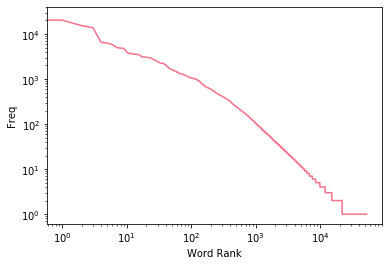

In [37]:
sorted_word_counts = sorted(list(word_count_dict1.values()), reverse=True)

with sns.color_palette("husl", 8): 
    plt.loglog(sorted_word_counts)
    plt.ylabel("Freq")
    plt.xlabel("Word Rank");

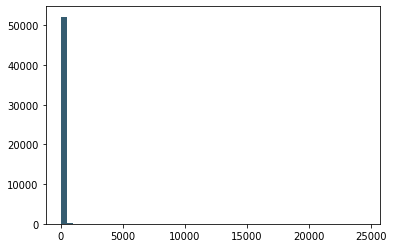

In [38]:
plt.hist(sorted_word_counts, bins=50, color = '#355c70');

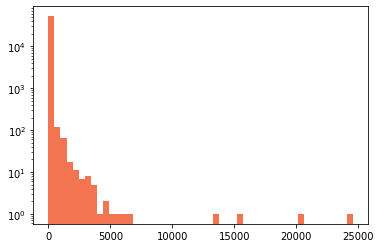

In [39]:
plt.hist(sorted_word_counts, bins=50, log=True, color = '#f37450' );

In [40]:
filtered_lower1

['de',
 'nombreuses',
 'plaintes',
 'insultes',
 'section',
 "'témoignages",
 'site',
 'kronocash',
 'non-paiement',
 'problème',
 'autre',
 'gpt',
 'sponsokdo',
 'bonjour',
 'tous',
 'toluna',
 'société',
 'internationale',
 '900',
 'collaborateurs',
 'dont',
 'mission',
 'permettre',
 'marques',
 'mieux',
 'comprendre',
 'leurs',
 'consommateurs',
 'chaque',
 'mois',
 'millions',
 'membres',
 'donnent',
 'avis',
 'chaque',
 'mois',
 'envoyons',
 'dizaines',
 'milliers',
 'chèques-cadeaux',
 'membres',
 'il',
 'arrivé',
 'récemment',
 'retard',
 'livraison',
 'chèques-cadeaux',
 'raisons',
 'pure',
 'logistique',
 'tenons',
 'excuser',
 'nous',
 'espérons',
 'bientôt',
 'pouvoir',
 'réduire',
 'délais',
 'livraison',
 'remercions',
 'avance',
 'patience',
 'fidélité',
 'cordialement',
 "l'équipe",
 'toluna',
 'edit',
 '17/10/2014',
 '15:56:47',
 'zouzitta',
 'dit',
 'site',
 'payer',
 'preuve',
 'si',
 'voila',
 'réponse',
 'gifthunterclub',
 'le',
 'problème',
 'compte',
 'payza',
 '

In [41]:
txt = filtered_lower1


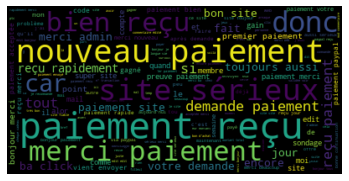

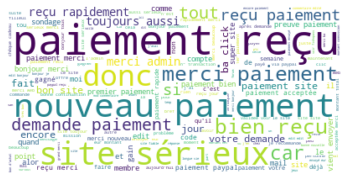

In [42]:
#word cloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests

#################################################################################

txt = ' '.join(txt)

# Generate a word cloud image
wordcloud = WordCloud().generate(txt)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(txt)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [44]:
word_count_dict1.most_common()[:20]

[('paiement', 24535),
 ('site', 20308),
 ('merci', 15306),
 ('reçu', 13735),
 ('bonjour', 6517),
 ('sérieux', 6264),
 ('bien', 5818),
 ('je', 4983),
 ('paypal', 4877),
 ('toujours', 4767),
 ('nouveau', 3949),
 ('bon', 3685),
 ('jours', 3646),
 ('demande', 3571),
 ('tous', 3539),
 ('depuis', 3486),
 ('edit', 3387),
 ('tout', 3134),
 ('mois', 3085),
 ('rapidement', 3083)]

In [46]:
text = filtered_lower1


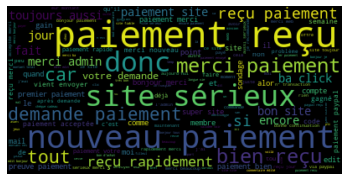

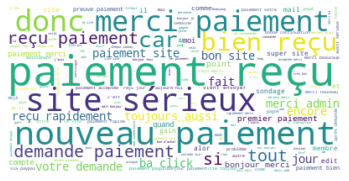

In [47]:
text = ' '.join(text)

# Generate a word cloud image
wordcloud = WordCloud().generate(txt)

with sns.color_palette("husl", 8): 
# Display the generated image:
# the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

# lower max_font_size
    wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


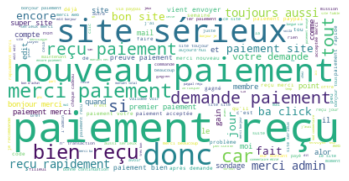

In [59]:
txxt = filtered_lower1

txxt = ' '.join(txxt)

# Generate a word cloud image
wordcloud = WordCloud().generate(txxt)

with sns.color_palette("husl", 8): 
# Display the generated image:
# the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

# lower max_font_size
    wordcloud = WordCloud(max_font_size=50, background_color="white").generate(txxt)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [60]:
#end here
wordcloud.to_file("foxy_NLTK_all.png")

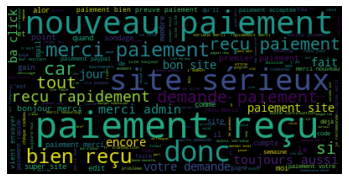

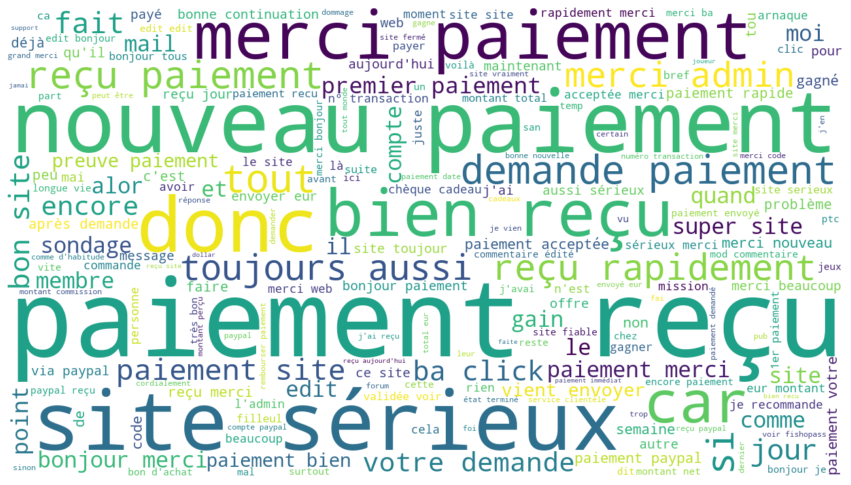

In [65]:
texttt = filtered_lower1

texttt = ' '.join(texttt)

# Generate a word cloud image
wordcloud = WordCloud().generate(textt)

with sns.color_palette("husl", 8): 
# Display the generated image:
# the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

# lower max_font_size
    wordcloud = WordCloud(max_font_size=200, 
                      background_color="white",
                      stopwords=STOPWORDS,
                      width=1280,
                      height=720,
                      ).generate(texttt) #change wordcloud origin here
    
    fig = plt.figure() # Create matplotlib figure
    fig.set_size_inches(15, 10)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

wordcloud.to_file("foxy_NLTK.png")

In [58]:
#filtered_lower1.to_csv('txt.csv')

In [56]:
#tdf = pd.DataFrame(filtered_lower1)

In [57]:
#tdf.to_csv('txt.csv', index=False)